In [22]:
from keras.preprocessing.image import load_img 
from keras.preprocessing.image import img_to_array 
from keras.applications.vgg16 import preprocess_input 
from keras.applications.vgg16 import VGG16 
from keras.models import Model
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle

In [23]:
path = r"/Users/azulmakk/Universidad/Proyecto Final/images"
os.chdir(path)

In [24]:
plantas = []

In [25]:
with os.scandir(path) as files:
    for file in files:
        if file.name.endswith('.png'):
            plantas.append(file.name)

In [26]:
model = VGG16()
model = Model(inputs = model.inputs, outputs = model.layers[-2].output)

In [27]:
def extract_features(file, model):
    img = load_img(file, target_size=(224,224))
    img = np.array(img) 
    reshaped_img = img.reshape(1,224,224,3) 
    imgx = preprocess_input(reshaped_img)
    features = model.predict(imgx, use_multiprocessing=True)
    return features

In [28]:
data = {}
p = r"/Users/azulmakk/Universidad/Proyecto Final/clustering.ipynb"

In [29]:
for planta in plantas:
    try:
        feat = extract_features(planta,model)
        data[planta] = feat
    except:
        with open(p,'wb') as file:
            pickle.dump(data,file)

1/1 [==============================] - 0s 252ms/step


In [ ]:
filenames = np.array(list(data.keys()))

feat = np.array(list(data.values()))

feat = feat.reshape(-1,4096)
unique_labels = [os.path.splitext(file)[0] for file in plantas]

In [ ]:
print(unique_labels)

['37801_16-1-1-4', '37186_2-10-1-7', '3205_5-5-1-3', '53823_1-4-1-1', '34234_13-5-1-3', '35576_6-3-1-2', '53821_15-8-1-1', '4083_6-1-1-1', '53824_14-35-1-2', '37420_4-5-1-1', '53772_11-6-1-3', '3213_10-3-1-1', '3707_16-8-1-3', '3227_37-7-1-2', '4083_22-1-1-1', '35656_11-3-1-4', '3175_19-2-1-4', '37807_1-5-6-6', '38454_1-1-25-8', '35656_3-3-1-7', '5258_34-6-1-2', '53823_1-7-2-3', '37328_10-1-1-4', '53825_24-15-1-4', '54118_6-2-8-2', '34199_11-1-1-2', '37941_1-4-7-7', '6747_16-5-1-5', '3142_45-1-1-4', '6747_38-2-1-4', '53824_33-33-1-1', '7274_6-5-1-4', '38349_1-2-6-2', '3152_11-2-1-3', '3181_74-4-1-1', '7106_53-4-1-2', '4478_7-1-1-1', '53851_36-6-1-4', '34852_9-5-1-4', '53819_15-7-1-2', '38028_1-9-8-7', '33881_13-4-1-3', '7098_101-1-1-4', '3175_16-5-1-4', '53824_35-37-1-2', '3152_27-6-1-2', '53851_13-14-1-3', '3258_1-5-1-8', '53821_31-4-1-1', '3153_21-6-1-2', '3152_26-4-1-4', '53975_45-9-1-2', '53822_28-13-1-2', '36804_14-1-1-5', '53853_3-3-1-2', '35656_13-4-1-7', '35656_13-4-1-6', '3732

In [ ]:
pca = PCA(n_components=100, random_state=22)
pca.fit(feat)
x = pca.transform(feat)

In [ ]:
kmeans = KMeans(n_clusters=len(unique_labels), random_state=22)
kmeans.fit(x)

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2000, random_state=22)

In [ ]:
groups = {}
for file, cluster in zip(filenames,kmeans.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)

In [ ]:
def view_cluster(cluster):
    plt.figure(figsize = (25,25));
    files = groups[cluster]
    if len(files) > 30:
        print(f"Clipping cluster size from {len(files)} to 30")
        files = files[:29]
    for index, file in enumerate(files):
        plt.subplot(10,10,index+1);
        img = load_img(file)
        img = np.array(img)
        plt.imshow(img)
        plt.axis('off')

In [ ]:
sse = []
list_k = list(range(3, 50))

for k in list_k:
    km = KMeans(n_clusters=k, random_state=22)
    km.fit(x)
    
    sse.append(km.inertia_)

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

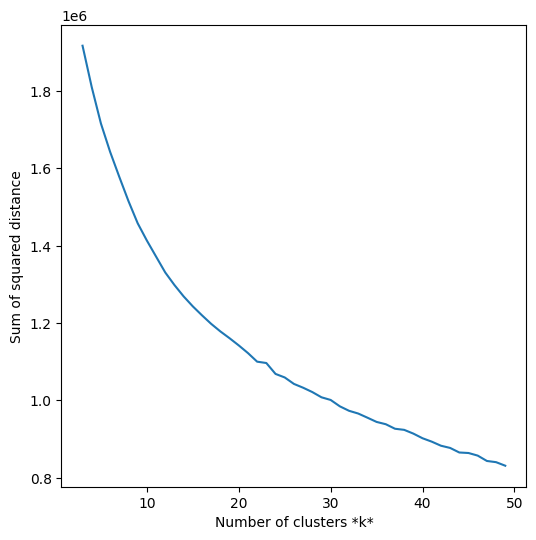

In [ ]:
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse)
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

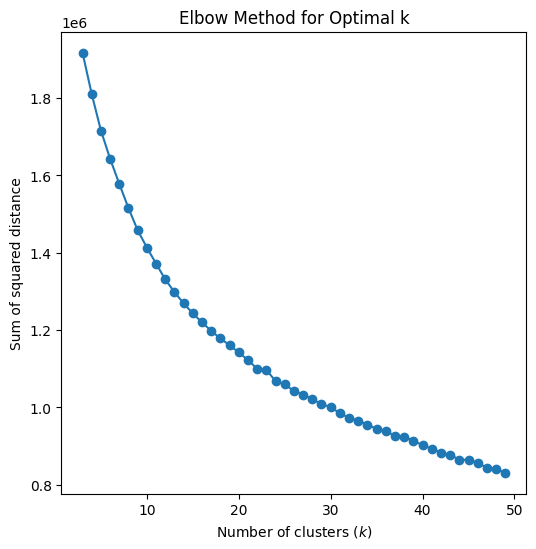

In [ ]:
unique_labels_with_clusters = list(zip(unique_labels, kmeans.labels_))

df_clusters = pd.DataFrame(unique_labels_with_clusters, columns=['label', 'cluster'])

df_clusters.to_csv('./labels_clusters.csv', index=False)

sse = []
list_k = list(range(3, 50))

for k in list_k:
    km = KMeans(n_clusters=k, random_state=22, n_init=10)
    km.fit(x)
    
    sse.append(km.inertia_)

plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, marker='o')
plt.xlabel(r'Number of clusters ($k$)')
plt.ylabel('Sum of squared distance')
plt.title('Elbow Method for Optimal k')
plt.show()

In [ ]:
num_clusters = 6  # Cantidad óptima de clústeres
kmeans = KMeans(n_clusters=num_clusters, random_state=22)
kmeans.fit(x)

df_clusters = pd.DataFrame({'label': unique_labels, 'cluster': kmeans.labels_})
df_clusters.to_csv('/Users/azulmakk/Universidad/Proyecto Final/label_cluster.csv', index=False)

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
